#Representación de textos (documentos)
El objetivo de este notebook es mostrar mecanismos que permitan representar diferentes elementos del lenguaje natural, particularmente los textos/documentos y a partir de ellos derivar aplicaciónes de procesamiento del lenguaje natural
## El corpus
Una primera etapa de representación implica tener una colección de documentos sobre la cual hacer la representación. Por ello es importante distinguir y obtener la colección de documentos.

In [1]:
import sklearn
import os, re, string, collections, random
import spacy
import nltk
import numpy as np 
import matplotlib
import pandas as pd

Vamos a mostrar primero la capacidad de NLTK de crear un corpus

In [3]:
# Código valido para colab
#from google.colab import drive
#drive.mount('/content/drive')
os.getcwd()

'/Users/habi/Documents/personal/nlp_course/clase 3'

In [4]:
from nltk.corpus import PlaintextCorpusReader
#corpus_root="/content/drive/My Drive/corpus/libros"
corpus_root = os.getcwd() + '/libros'
corpusesp=PlaintextCorpusReader(corpus_root,".*", encoding="UTF-8")
"""para ver que archivos quedaron"""
corpusesp.fileids()


['candido-de-voltaire.txt',
 'cuentos_allan_poe.txt',
 'el-buscon.txt',
 'elquijote.txt',
 'fabulas_samaniego.txt',
 'juan_tenorio.txt',
 'libro_cocina.txt',
 'milyuna_t1.txt',
 'obras-escogidas_becquer.txt',
 'odisea.txt',
 'relacionhistoricasucesosdetupacamaru.txt',
 'tradiciones_peruanas_ricardo_palma.txt']

Ahora veamos una de sus capacidades: ver las frecuencias en diferentes documentos y compararlas. Resulta evidente que podemos entender características de un documento a partir de su comparación con otros documentos

In [5]:
condf=nltk.ConditionalFreqDist(
        (libro,palabra)
        for libro in corpusesp.fileids()
        for palabra in corpusesp.words(libro))

condf.tabulate(samples=["hombre","mujer"])


                                         hombre  mujer 
                 candido-de-voltaire.txt     47      0 
                   cuentos_allan_poe.txt     36     26 
                           el-buscon.txt     57     22 
                           elquijote.txt    258    222 
                   fabulas_samaniego.txt     53      9 
                        juan_tenorio.txt     46      8 
                        libro_cocina.txt     11      1 
                          milyuna_t1.txt     46     51 
             obras-escogidas_becquer.txt     42     72 
                              odisea.txt    118     97 
relacionhistoricasucesosdetupacamaru.txt      5      0 
  tradiciones_peruanas_ricardo_palma.txt     37     33 


Ello lleva a pensar que comparando los documentos podemos obtener un resumen (Wordcloud) del documento que, en el fondo, es la representación del documento.
Para ello vamos a crear nuestro propio corpus de manera iterativa con archivos de texto

In [6]:
#os.chdir("/content/drive/My Drive/corpus/libros")
os.chdir(corpus_root)
documents = []
for f in os.listdir():
    if f[-4:] == '.txt':
        documents.append(f[:-4])



In [7]:
documents

['juan_tenorio',
 'odisea',
 'el-buscon',
 'fabulas_samaniego',
 'libro_cocina',
 'tradiciones_peruanas_ricardo_palma',
 'relacionhistoricasucesosdetupacamaru',
 'milyuna_t1',
 'candido-de-voltaire',
 'cuentos_allan_poe',
 'elquijote',
 'obras-escogidas_becquer']

In [8]:
len(documents)

12

In [12]:
contents = []
for document in documents:
    with open(document+'.txt', 'r', encoding="UTF-8") as f:
        contents.append(f.read())
len(contents)
# Continua con una limpieza de los libros, quitando encabezados y algunos caracteres especiales

12

In [13]:
for i in range(0,len(contents)):
    inicio=contents[i].find("EBOOK")
    final=contents[i].find("END OF")
    contents[i]=contents[i][inicio+4:final]

In [14]:
for i in range(len(contents)):
    contents[i] = re.sub("\""," ",contents[i])
    contents[i] = re.sub ("\n|\t"," ",contents[i])
    contents[i]=contents[i].lower()


## Representación de textos y palabras: One-hot encoding, TF y TF-IDF
Vamos a utilizar tres técnicas básicas para representar semánticamente textos en un corpus: One hot encoding (cada palabra del vocabulario en el texto tiene 1, de resto tiene 0), TF (cada palabra del vocabulario en el texto tiene *el conteo de su frecuencia*, de resto tiene 0) y una técnica denominada TF-IDF para encontrar las palabras más relevantes de un texto a partir de su comparación con otros textos. En particular TF-IDF relaciona la frecuencia de los términos en el texto (documento) y la frecuencia de los mismos términos en la colección de documentos. A mayor frecuencia del término/palabra (TF=Term frequency), mayor importancia; a mayor porcentaje de documentos con el término/palabra, **menor** importancia (por eso se llama IDF: Inverse Document Frequency)
Cargamos las librerías necesarias para hacerlo de forma automática

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Al crear la representación puede ser necesario definir una frecuencia máxima de documentos (max_df) para evitar stopwords, una frecuencia mínima de documentos (min_df) para usar palabras compartidas, y un número máximo de palabras (max_features) puesto que la dimensionalidad del lenguaje (número de palabras) puede ser alta y costosa computacionalmente. Nótese que se establece *binary=True* para que la representación sea de unos y ceros (*one-hot encoding*)

In [16]:
libros_onehot=CountVectorizer(max_df=0.9,min_df=2,max_features=1000, binary=True)
oh_dfm=libros_onehot.fit_transform(contents)
vocabulario=libros_onehot.get_feature_names_out()
print(vocabulario[0:100])

['abajo' 'abierta' 'abrigo' 'abrió' 'acaba' 'acababa' 'acabar' 'acabó'
 'acaso' 'acompañado' 'acto' 'acuerdo' 'acá' 'admirado' 'adorno'
 'adquirir' 'advertido' 'advertir' 'advirtió' 'adónde' 'afecto'
 'agradable' 'agujero' 'ah' 'ahí' 'aire' 'alas' 'alcance' 'alcanza'
 'alegre' 'alegres' 'algún' 'alrededor' 'altas' 'amantes' 'ambos'
 'amistad' 'amo' 'ancho' 'andaba' 'andar' 'animal' 'animales' 'anterior'
 'antiguo' 'antiguos' 'antojo' 'apariencia' 'aposento' 'aquél' 'ardiente'
 'armas' 'arriba' 'arrojó' 'asiento' 'asistir' 'aspecto' 'asunto' 'at'
 'atado' 'atención' 'atento' 'atravesado' 'atravesar' 'atravesó'
 'atrevido' 'atrevió' 'atrás' 'aurora' 'ausencia' 'autor' 'autoridad'
 'ave' 'averiguar' 'aves' 'ay' 'ayer' 'ayuda' 'azul' 'añadió' 'aún' 'baja'
 'barba' 'bastante' 'batalla' 'beber' 'bebiendo' 'bella' 'belleza'
 'bienes' 'blancas' 'blancos' 'bondad' 'brazo' 'breve' 'bueno' 'buscando'
 'caballeros' 'caballo' 'caballos']


Notese que las restricciones puestas fueron una manera **elegante** de reducir el vocabulario, descartando palabras. De hecho, creamos un conjunto de "stopwords" para el corpus que se está usando. Miremos esos stopwords:

In [17]:
len(libros_onehot.stop_words_)

59304

In [18]:
print(libros_onehot.stop_words_)

{'calmado', 'entrares', 'footnote', 'mismo', 'regio', 'recibimiento', 'suplemento', 'acevedo', 'amasijo', 'finta', 'correa', '339', 'memorias', 'dilatarme', 'largamente', 'querrían', 'llamáis', 'muro', 'capitular', 'acomodáremos', 'trincheras', 'hurra', 'mandarles', 'quiérole', 'leelde', 'padilla', 'hidiondas', 'gondoleros', 'palpándolo', '81', 'criptana', 'apestan', 'going', 'agradecimiento', '_pinturero_', 'desollándola', 'niegan', 'agasaja', 'duelas', 'calzó', 'corchete', 'aterrorizados', 'cimera', 'ἶρος', 'repetia', 'oceánida', 'profesaban', 'suspenda', 'alterarse', 'worst', 'desproporcionada', 'atados', 'ratonescas', 'crucifícalos', 'estruendo', 'angelico', 'partamos', 'vendieron', '_sociedades', 'asustó', 'expresadas', 'traspiracion', '1282', 'servicial', 'poneros', 'πᾶσα', 'confidentes', 'mortal', 'reponer', 'agregaba', 'ahogaron', 'cerrándose', 'quítanme', '_cortejo_', 'recibiendole', 'friscal', 'horrísona', 'notablemente', 'esperarla', 'cuadriga', 'derretida', 'estrictas', 'fo

La reprsentación se da inicialmente en una matriz dispersa por motivos de ahorro de espacio

In [19]:
print(oh_dfm[0:30])

  (0, 289)	1
  (0, 512)	1
  (0, 10)	1
  (0, 393)	1
  (0, 58)	1
  (0, 579)	1
  (0, 254)	1
  (0, 739)	1
  (0, 337)	1
  (0, 839)	1
  (0, 524)	1
  (0, 947)	1
  (0, 492)	1
  (0, 366)	1
  (0, 225)	1
  (0, 117)	1
  (0, 855)	1
  (0, 176)	1
  (0, 326)	1
  (0, 365)	1
  (0, 894)	1
  (0, 773)	1
  (0, 261)	1
  (0, 619)	1
  (0, 346)	1
  :	:
  (11, 213)	1
  (11, 104)	1
  (11, 926)	1
  (11, 851)	1
  (11, 571)	1
  (11, 895)	1
  (11, 812)	1
  (11, 578)	1
  (11, 713)	1
  (11, 890)	1
  (11, 841)	1
  (11, 798)	1
  (11, 348)	1
  (11, 493)	1
  (11, 358)	1
  (11, 778)	1
  (11, 495)	1
  (11, 172)	1
  (11, 687)	1
  (11, 701)	1
  (11, 577)	1
  (11, 368)	1
  (11, 391)	1
  (11, 268)	1
  (11, 367)	1


In [20]:
denso_oh=oh_dfm.todense()
listadensa_oh=denso_oh.tolist()
dfm_oh_base=pd.DataFrame(listadensa_oh,columns=vocabulario)
dfm_oh=dfm_oh_base.transpose()
dfm_oh.columns=documents
display(dfm_oh)


,juan_tenorio,odisea,el-buscon,fabulas_samaniego,libro_cocina,tradiciones_peruanas_ricardo_palma,relacionhistoricasucesosdetupacamaru,milyuna_t1,candido-de-voltaire,cuentos_allan_poe,elquijote,obras-escogidas_becquer
abajo,0,1,1,1,1,1,0,1,0,1,1,0
abierta,0,1,1,1,0,1,0,1,1,1,1,1
abrigo,0,1,1,1,1,1,1,1,0,1,1,1
abrió,0,1,1,1,0,1,0,1,1,1,1,1
acaba,1,1,0,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
época,1,1,0,1,1,1,1,1,0,1,0,1
ésta,1,1,1,1,1,1,0,1,0,1,1,1
éstos,1,1,1,1,1,1,0,1,0,1,1,1
órdenes,0,1,1,0,0,1,1,1,1,1,1,1


Para representar frecuencias de términos, basta con eliminar el elemento *binary=True*

In [21]:
libros_TF=CountVectorizer(max_df=0.9,min_df=2,max_features=1000)
tf_dfm=libros_TF.fit_transform(contents)
vocabularioTF=libros_TF.get_feature_names_out()
denso_tf=tf_dfm.todense()
listadensa_tf=denso_tf.tolist()
dfm_tf_base=pd.DataFrame(listadensa_tf,columns=vocabularioTF)
dfm_tf=dfm_tf_base.transpose()
dfm_tf.columns=documents
display(dfm_tf)

,juan_tenorio,odisea,el-buscon,fabulas_samaniego,libro_cocina,tradiciones_peruanas_ricardo_palma,relacionhistoricasucesosdetupacamaru,milyuna_t1,candido-de-voltaire,cuentos_allan_poe,elquijote,obras-escogidas_becquer
10,0,17,0,6,17,6,14,3,0,1,1,0
_de,0,2,0,25,10,8,0,0,10,2,0,5
_el,0,1,0,30,0,19,2,4,1,19,0,7
_la,0,1,0,39,0,7,0,9,0,12,0,7
abajo,0,2,17,2,4,3,0,2,0,23,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ítaca,0,175,0,1,0,0,0,0,0,0,0,0
órden,0,0,0,0,20,0,39,0,6,0,0,0
órdenes,0,3,1,0,0,9,28,4,1,4,11,6
último,0,23,0,9,29,10,13,11,3,13,27,59


Finalmete vamos a calcular TF-IDF,cambiando la función de scikit-learn. Esta representación puede resultar mejor al tener en cuenta la frecuencia inversa en los documentos.

In [22]:
libros_tfidf=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfidf_dfm=libros_tfidf.fit_transform(contents)
vocabulariotfidf=libros_tfidf.get_feature_names_out()
denso_tfidf=tfidf_dfm.todense()
listadensa_tfidf=denso_tfidf.tolist()
dfm_tfidf_base=pd.DataFrame(listadensa_tfidf,columns=vocabulariotfidf)
dfm_tfidf=dfm_tfidf_base.transpose()
dfm_tfidf.columns=documents
display(dfm_tfidf)

,juan_tenorio,odisea,el-buscon,fabulas_samaniego,libro_cocina,tradiciones_peruanas_ricardo_palma,relacionhistoricasucesosdetupacamaru,milyuna_t1,candido-de-voltaire,cuentos_allan_poe,elquijote,obras-escogidas_becquer
10,0.0,0.004615,0.000000,0.013749,0.010077,0.013315,0.018791,0.003681,0.000000,0.002531,0.000150,0.000000
_de,0.0,0.000590,0.000000,0.062223,0.006438,0.019282,0.000000,0.000000,0.028881,0.005497,0.000000,0.009744
_el,0.0,0.000271,0.000000,0.068747,0.000000,0.042164,0.002684,0.004908,0.002659,0.048082,0.000000,0.012560
_la,0.0,0.000321,0.000000,0.105793,0.000000,0.018388,0.000000,0.013071,0.000000,0.035948,0.000000,0.014868
abajo,0.0,0.000543,0.042259,0.004583,0.002371,0.006657,0.000000,0.002454,0.000000,0.058205,0.006134,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
ítaca,0.0,0.085672,0.000000,0.004132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
órden,0.0,0.000000,0.000000,0.000000,0.018885,0.000000,0.083381,0.000000,0.025414,0.000000,0.000000,0.000000
órdenes,0.0,0.000752,0.002294,0.000000,0.000000,0.018434,0.034686,0.004530,0.002454,0.009343,0.001519,0.009936
último,0.0,0.005328,0.000000,0.017598,0.014668,0.018936,0.014888,0.011516,0.006807,0.028072,0.003447,0.090331


Obtenemos una matriz de términos vs documentos, en donde podríamos definir numéricamente un término como su vector de TF-IDF en los documentos, y definir numéricamente un documento como su vector de términos en términos de TF-IDF. Usaremos esa potente idea de construir vectores numéricos (de términos o de documentos) más adelante como un elemento central a la hora de realizar aplicaciones de lenguaje natural.

In [23]:
dfm_tfidf.shape

(1000, 12)

In [24]:
documents

['juan_tenorio',
 'odisea',
 'el-buscon',
 'fabulas_samaniego',
 'libro_cocina',
 'tradiciones_peruanas_ricardo_palma',
 'relacionhistoricasucesosdetupacamaru',
 'milyuna_t1',
 'candido-de-voltaire',
 'cuentos_allan_poe',
 'elquijote',
 'obras-escogidas_becquer']

Vamos a ordenar cada documento según sus palabras más *importantes* o *diferenciales* , las que tienen mayor TF-IDF

In [25]:
cocinatfidf=dfm_tfidf.sort_values(["libro_cocina"], ascending=False)
display(cocinatfidf)

,juan_tenorio,odisea,el-buscon,fabulas_samaniego,libro_cocina,tradiciones_peruanas_ricardo_palma,relacionhistoricasucesosdetupacamaru,milyuna_t1,candido-de-voltaire,cuentos_allan_poe,elquijote,obras-escogidas_becquer
salsa,0.000000,0.000000,0.000000,0.000000,0.383362,0.003535,0.000000,0.000000,0.000000,0.000000,0.000477,0.000000
manteca,0.000000,0.000000,0.000000,0.000000,0.357658,0.003173,0.000000,0.010525,0.000000,0.000000,0.000214,0.000000
caldo,0.000000,0.000000,0.031677,0.000000,0.287994,0.010605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
despues,0.000000,0.000000,0.000000,0.000000,0.268165,0.000000,0.196693,0.000000,0.110129,0.000000,0.000000,0.000000
pimienta,0.000000,0.000000,0.000000,0.000000,0.238370,0.000000,0.000000,0.002212,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
hago,0.001967,0.000232,0.008484,0.001955,0.000000,0.001894,0.005726,0.002094,0.002269,0.000000,0.008425,0.003062
hallaba,0.000000,0.006950,0.010606,0.007821,0.000000,0.009468,0.035503,0.008375,0.002269,0.019434,0.003447,0.004593
hallaban,0.000000,0.003244,0.000000,0.000000,0.000000,0.016872,0.042275,0.000000,0.002888,0.010994,0.000975,0.007795
hallado,0.000000,0.000000,0.010800,0.002489,0.000000,0.004820,0.000000,0.000000,0.008664,0.002749,0.009749,0.003898


In [26]:
cocinatfidf["palabra"]=cocinatfidf.index
solococinatfidf=cocinatfidf[["libro_cocina","palabra"]]

#cocinafinal=cocinatfidf[[0,"palabra"]]
#cocinafinal.columns=["tf-idf","palabra"]
solococinatfidf.head(10)


,libro_cocina,palabra
salsa,0.383362,salsa
manteca,0.357658,manteca
caldo,0.287994,caldo
despues,0.268165,despues
pimienta,0.238370,pimienta
sal,0.233666,sal
cacerola,0.179579,cacerola
cocer,0.164614,cocer
sopa,0.127129,sopa
cocido,0.121197,cocido


Eso nos permite generar un wordcloud más limpio de lo que diferencia a un documento

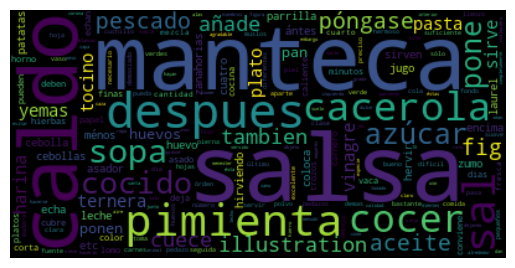

None

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##Wordcloud con las palabras del tf-idf
diccio={}
for freq,name in solococinatfidf.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figura1=plt.show()
display(figura1)

## Distancia entre vectores (términos,documentos) y sus aplicaciones: La similitud coseno
Una vez se representan los documentos (o términos) como vectores es posible calcular una distancia entre ellos.
La distancia coseno es ideal si se requiere comparar documentos más largos con otros más cortos, y también para  vectores con muchos ceros. Por eso es ideal en contextos de NLP.
Por ejemplo, podemos usarlo como motor de búsqueda:

In [28]:
busqueda="importancia del reciclaje"
#oracion0="El reciclaje de papel es importante para el bien del mundo"
oracion0="Reciclar es muy importante en el mundo"
oracion1="El quijote es un personaje de novela inigualable. Sus ocurrencias y sus andanzas son inimitables"
oracion2="El papel es un elemento que puede ser sometido a reciclaje. En el mundo cada vez hay más importancia en este tema"
oracionpoc=[busqueda,oracion0,oracion1,oracion2]


Ahora calculamos su TF, y luego su distancia coseno. 
Usamos TFIDF para poder hacer la normalización de los datos.
Quien tenga menor distancia coseno es el mejor "match" para la búsqueda; en este caso, como se calcula la similitud (1- distancia coseno), se debe buscar la mayor similitud.

In [31]:
vect = TfidfVectorizer(use_idf=False, norm="l2")
tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names_out()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()

finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1, index=["busqueda","oracion0","oracion1","oracion2"])
##aqui no traspongo

from sklearn.metrics.pairwise import cosine_similarity
buscando=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
display(buscando)

array([[0.        , 0.        , 0.23094011]])

In [40]:
finalcz1.index[np.argmax(buscando)+1]

'resp2'

In [41]:
finalcz1

,artículos,bajos,cuál,de,deportivos,el,es,horario,la,los,más,precios,tienda,tiene,vende
busqueda,0.000000,0.000000,0.377964,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000
resp0,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214
resp1,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000
resp2,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.377964,0.377964,0.377964,0.377964,0.000000


Nótese que es indispensable que haya palabras exactamente iguales. Sin embargo eso puede trabajarse (o resolverse) con representaciones de palabras.
También podemos hacer un sistema de respuesta a preguntas:

In [42]:
busqueda="¿cuál es el horario de la tienda?"
resp0="la tienda vende artículos deportivos"
resp1="La tienda tiene horario de 8 a 5"
resp2="La tienda tiene los precios más bajos"

oracionpoc=[busqueda,resp0,resp1,resp2]

tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names_out()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()
finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1,index=["busqueda","resp0","resp1","resp2"])
from sklearn.metrics.pairwise import cosine_similarity
respondiendo=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
print(oracionpoc[np.argmax(respondiendo)+1])

La tienda tiene horario de 8 a 5


También podemos hacer agrupaciones de textos, clasificando los mismos en grupos. Vamos a agrupar canales de televisión según sus descripciones

In [34]:
os.chdir('..')
os.getcwd()

'/Users/habi/Documents/personal/nlp_course/clase 3'

In [43]:
import pandas as pd
#os.chdir("/content/")
canales = pd.read_excel("canales_revisado.xlsx")
canales.head(6)


/Users/habi/opt/anaconda3/envs/jave/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,channel,descripcion
0,1,6.1 Multimedios Guadalajara,Además de la programación de noticieros y depo...
1,2,A&E,El canal se centró originalmente en la program...
2,3,A+,Es una red de canales de televisión mexicana d...
3,4,Adenalina,Adrenalina Sports Network (antes conocido como...
4,5,ADN40,Es un canal de televisión abierta mexicana pr...
5,6,AMC,AMC es un canal de televisión por suscripción ...


In [44]:
textocanales=canales["descripcion"].values.tolist()
len(textocanales)

119

In [45]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
misstop=stopwords.words("spanish")+["á","Y"]

def filtrado(texto):
    filtrados=[word for word in texto if word not in misstop]
    return(filtrados)    

[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import os,re
nltk.download("punkt")
filtradito=[]

for i in range(len(textocanales)):
    textocanales[i] = re.sub("\""," ",textocanales[i])
    textocanales[i] = re.sub ("\n|\t"," ",textocanales[i])
    textocanales[i]=textocanales[i].lower()
    breve=nltk.tokenize.word_tokenize(textocanales[i],language="spanish")
    tempfilt=filtrado(breve)
    filtradito.append(tempfilt)
    
unidito=[]
for element in filtradito:
    unidito.append(" ".join(element))
unidito

[nltk_data] Downloading package punkt to /Users/habi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['además programación noticieros deportes , multimedios televisión cuenta programas entretenimiento : chismorreo : programa vespertino espectáculos farándula . show : programa entretenimiento enfocado público mayor edad . adivigana : programa concursos nocturno vivalavi : programa revista matutino presentan secciones belleza información .',
 'canal centró originalmente programación biografías , documentales , series ( especial dramas criminales misterios ) , tarde expandido incluir telerrealidad . ( the network was originally founded in 1984 as the arts & entertainment network , initially focusing on fine arts , documentaries ( including its then-flagship series biography ) , and dramas ( including imported series from the united kingdom ) . in 1995 , the network rebranded as & , in an effort to downplay the negative perceptions of arts programming and generally market the network as thought-provoking alternative to other television channels . in 2002 , at the expense of its arts progr

Creamos el Tf-idf de cada descripción de canal

In [48]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
##notse que no uso max_features porque no espero un volumen grande de palabras.
vectores=TfidfVectorizer(max_df=0.9,min_df=3)
tfslimpio=vectores.fit_transform(unidito)
nombreslimpio=vectores.get_feature_names_out()
matriz=tfslimpio.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombreslimpio)
final2=finalm.transpose()
finalm.head(10)

,10,11,12,1990,1991,2012,2016,2019,24,30,...,varios,viacomcbs,vida,virtual,vivo,walt,warnermedia,wild,with,último
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158832,0.0,0.150779
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [49]:
finalm.shape

(119, 371)

In [50]:
print(nombreslimpio)

['10' '11' '12' '1990' '1991' '2012' '2016' '2019' '24' '30' 'abierta'
 'acción' 'actualidad' 'actualmente' 'además' 'adulto' 'adultos'
 'afiliadas' 'ahora' 'ambiente' 'america' 'americas' 'amplia' 'américa'
 'and' 'animadas' 'animal' 'animales' 'anteriormente' 'análisis' 'archivo'
 'argentina' 'arte' 'así' 'at' 'audiencia' 'aventuras' 'azteca' 'años'
 'bajo' 'basa' 'basada' 'belleza' 'bloque' 'box' 'broadcasting' 'busca'
 'by' 'cable' 'cadena' 'cadenas' 'calidad' 'campos' 'canal' 'canales'
 'cantidad' 'cartoon' 'casa' 'channel' 'chihuahua' 'ciencia' 'cine'
 'ciudad' 'ciudades' 'cobertura' 'colombia' 'comedia' 'comedias'
 'comercial' 'communications' 'company' 'compone' 'compuesta'
 'comunicaciones' 'conocida' 'conocido' 'consiste' 'contenido'
 'contenidos' 'corte' 'csi' 'cuenta' 'cultura' 'cultural' 'culturales'
 'debate' 'debates' 'dedicado' 'dentro' 'deporte' 'deportes' 'deportivo'
 'deportivos' 'desarrollo' 'diferentes' 'difusión' 'dirigida' 'discovery'
 'dish' 'disney' 'distintas'

Calculamos la similitud coseno entre canales

In [51]:
from sklearn.metrics.pairwise import cosine_similarity


In [52]:
similitudes=cosine_similarity(finalm[0:128],finalm[0:128])
similitudes[0:5,0:5]


array([[1.        , 0.00242243, 0.04164852, 0.0590956 , 0.10067329],
       [0.00242243, 1.        , 0.00736074, 0.26365949, 0.02113587],
       [0.04164852, 0.00736074, 1.        , 0.01463549, 0.36079617],
       [0.0590956 , 0.26365949, 0.01463549, 1.        , 0.05866491],
       [0.10067329, 0.02113587, 0.36079617, 0.05866491, 1.        ]])

para aplicar K-means debemos normalizar la distancia coseno

In [53]:
import numpy as np
finalsinceros=finalm.loc[finalm.sum(axis=1)!=0,]
length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None]
finalm2 = finalsinceros / length
##corregir si lenght=0


/var/folders/p1/3s8c0dxx21bfvlztxjr_3h840000gp/T/ipykernel_7328/1022059354.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None]


In [54]:
finalsinceros.shape

(119, 371)

para aplicar k-medias miramos el gráfico de codo y así proponer un número de clusteres

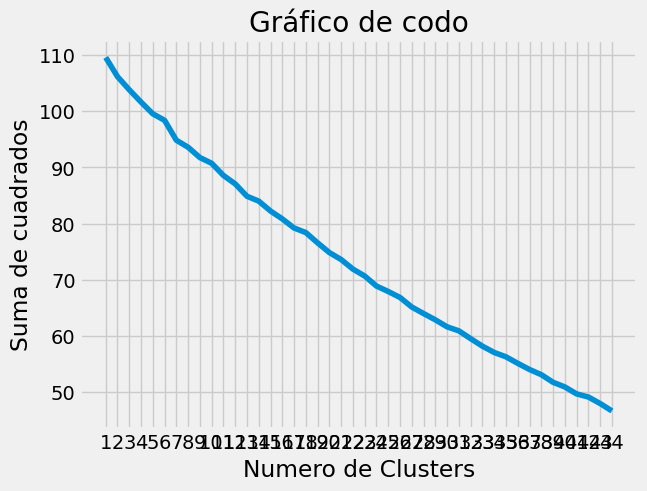

In [55]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

sse=[]
for k in range(1, 45):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(finalm2)
  sse.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 45), sse)
plt.xticks(range(1, 45))
plt.xlabel("Numero de Clusters")
plt.ylabel("Suma de cuadrados")
plt.title('Gráfico de codo')
plt.show()



No resultó tan claro el número de clusteres. Tomaremos un número que consideremos conveniente.

In [56]:
kmeans = KMeans(n_clusters=8).fit(finalm2)
centroids = kmeans.cluster_centers_
display(centroids)




array([[ 7.08613257e-02, -8.67361738e-19, -1.73472348e-18, ...,
         0.00000000e+00,  1.55206936e-02,  1.60935194e-02],
       [ 1.18152975e-02,  0.00000000e+00, -1.73472348e-18, ...,
         1.95018274e-02,  0.00000000e+00,  1.24543767e-02],
       [ 1.73472348e-18,  1.73472348e-18,  2.24891172e-02, ...,
         6.90574594e-03,  2.52569841e-02,  6.55562016e-03],
       ...,
       [ 1.73472348e-18,  0.00000000e+00,  8.67361738e-19, ...,
         0.00000000e+00,  3.98026500e-02,  3.51635145e-02],
       [ 1.73472348e-18,  8.67361738e-19, -1.73472348e-18, ...,
         0.00000000e+00,  0.00000000e+00, -8.67361738e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Extraemos los indices de las palabras más "representativas" (centroide más alto)

In [57]:

destacados=np.argsort(centroids,axis=1)[:,-4:]
display(destacados)



array([[259, 225, 180, 310],
       [ 62, 337, 229,  49],
       [ 53, 288,  90, 289],
       [105, 169,  53, 185],
       [137, 325, 257, 201],
       [ 66, 290, 342,  24],
       [288,  61,  53, 269],
       [208, 140, 173, 146]])

In [58]:
destacados.shape

(8, 4)

In [59]:
#guardo como listas los indices y las palabras
llevarlos=destacados.tolist()
paltotal=nombreslimpio.tolist()
#detecto que palabras corresponden a cada cluster
palabras_total=[]
for i in range(len(llevarlos)):
  palabras_linea=[]
  for k in range(len(llevarlos[i])):
    palabras_linea.append(paltotal[llevarlos[i][k]])
  palabras_total.append(palabras_linea)
print(palabras_total)

[['originales', 'mundo', 'infantil', 'series'], ['ciudad', 'televisión', 'méxico', 'cadena'], ['canal', 'programación', 'deportes', 'programas'], ['documentales', 'history', 'canal', 'internacional'], ['estadounidense', 'suscripción', 'origen', 'latinoamericano'], ['comedia', 'programming', 'the', 'and'], ['programación', 'cine', 'canal', 'películas'], ['líder', 'estrellas', 'horóscopos', 'famosos']]


Como vemos los clusteres contienen algunas palabras descriptivas útiles para la clasificación de los canales, y otras palabras que nos hablan más bien del tipo de lenguaje o redacción de los textos

Asigno los clusteres a los canales para observarlos

In [61]:
labels = pd.DataFrame(kmeans.predict(finalm2))
totalcl=pd.concat([canales,labels],axis=1)
totalcl.columns=["id","canal","descripcion","cluster"]
totalcl.sort_values(by=['cluster'], inplace=True)
display(totalcl)


,id,canal,descripcion,cluster
118,128,Zee Mundo,Zee Mundo es un canal de televisión por suscri...,0
40,46,Discovery Kids,Canal enfocado a la audiencia infantil. Princi...,0
41,47,Disney Channel,Se comercializa principalmente a niños; sin em...,0
21,26,Canal 5,Su programación está orientada al público infa...,0
43,49,Disney XD,Series originales y antiguas en un solo lugar ...,0
...,...,...,...,...
93,99,Platino,El Canal Cinema Platino es un canal de televis...,6
73,79,Las Estrellas - 1 Hr.,Las Estrellas es líder de contenidos de teleno...,7
74,80,Las Estrellas -2 Hrs.,Las Estrellas es líder de contenidos de teleno...,7
75,81,Las Estrellas el Paso,Las Estrellas es líder de contenidos de teleno...,7
